In [121]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [124]:
df=pd.read_csv(r"C:\Users\sanju\Downloads\Task1_Data_GoComedy.data")
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [125]:
df.shape

(13, 5)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          13 non-null     int64 
 1   Experience   13 non-null     int64 
 2   Rank         13 non-null     int64 
 3   Nationality  13 non-null     object
 4   Go           13 non-null     object
dtypes: int64(3), object(2)
memory usage: 652.0+ bytes


In [127]:
df.describe()

,Age,Experience,Rank
count,13.000000,13.000000,13.000000
mean,39.615385,8.846154,6.846154
std,13.263600,5.727800,1.908147
min,18.000000,3.000000,4.000000
25%,35.000000,4.000000,5.000000
50%,42.000000,9.000000,7.000000
75%,45.000000,13.000000,9.000000
max,66.000000,21.000000,9.000000


In [131]:
# Encode categorical variables
le_nationality = LabelEncoder()
le_go = LabelEncoder()

In [132]:
df["Nationality"] = le_nationality.fit_transform(df["Nationality"])
df["Go"] = le_go.fit_transform(df["Go"])  # Yes=1, No=0

In [133]:
X = df[['Age', 'Experience', 'Rank', 'Nationality']]
y = df['Go']

In [134]:
# Train Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

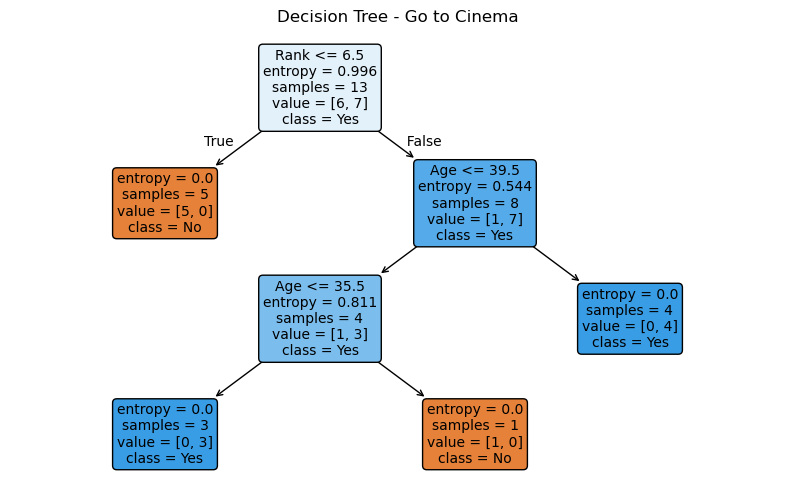

In [141]:
plt.figure(figsize=(10,6))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=["No", "Yes"],  # Target: Go
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree - Go to Cinema")
plt.show()

In [142]:
# Best attribute
root_feature = X.columns[clf.tree_.feature[0]]
print("Best attribute at root node:", root_feature)

Best attribute at root node: Rank


In [143]:
# Feature ranking
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature ranking based on importance:")
print(importances)


Feature ranking based on importance:
       Feature  Importance
2         Rank    0.664063
0          Age    0.335937
1   Experience    0.000000
3  Nationality    0.000000


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [11]:
df=pd.read_csv(r"C:\Users\sanju\Downloads\breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.shape

(569, 32)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
# Drop id and diagnosis from df
X = df.drop(["id", "diagnosis"], axis=1)
y = df["diagnosis"]

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [35]:
# Train random forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [44]:
# Predictions on test set
y_pred = clf.predict(X_test)

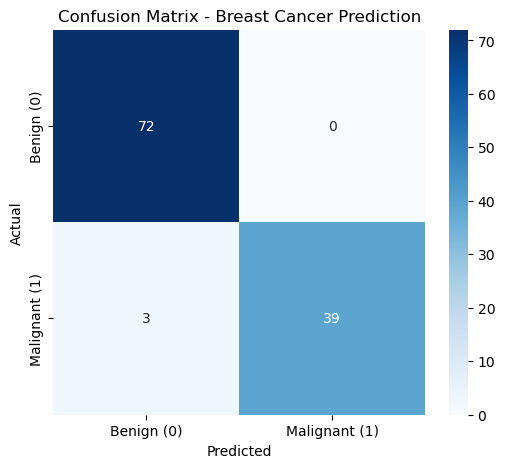

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Breast Cancer Prediction")
plt.show()

In [54]:
# Classification Report (Precision, Recall, F1)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Classification Report:

              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [38]:
# Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

In [39]:
# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

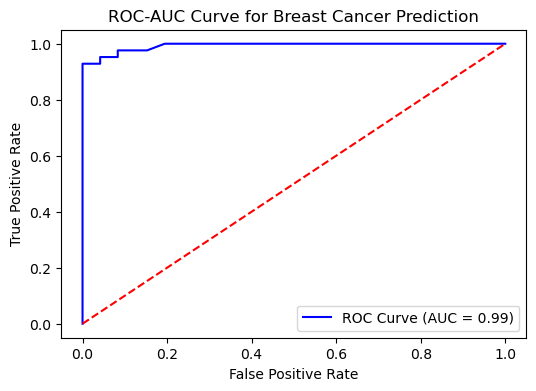

In [51]:
# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='red', linestyle='--')  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Breast Cancer Prediction")
plt.legend(loc="lower right")
plt.show()

In [55]:
# Create feature importance DataFrame
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances.head(10))

                 Feature  Importance
23            area_worst    0.139357
27  concave points_worst    0.132225
7    concave points_mean    0.107046
20          radius_worst    0.082848
22       perimeter_worst    0.080850
2         perimeter_mean    0.067990
6         concavity_mean    0.066917
3              area_mean    0.060462
26       concavity_worst    0.037339
0            radius_mean    0.034843


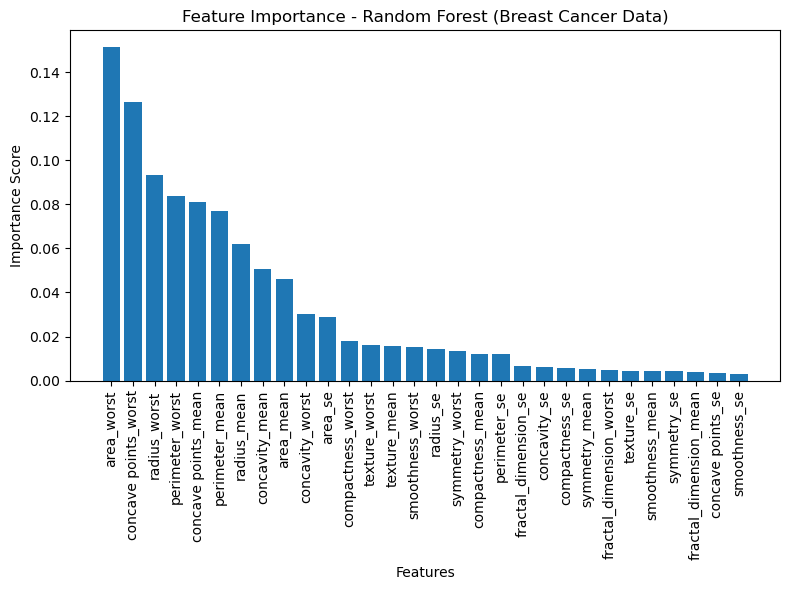

In [56]:
# Plot
plt.figure(figsize=(8,6))
plt.title("Feature Importance - Random Forest (Breast Cancer Data)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv(r"C:\Users\sanju\Downloads\Task3_Data_TimeSeriesRegression.csv")
df.head()

,t,f(t)
0,0.479155,0.472010
1,-1.021461,37.567432
2,-4.467154,1507.309054
3,1.130598,5.036163
4,-1.007833,36.566910


In [4]:
df.shape

(1000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       1000 non-null   float64
 1   f(t)    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
df.describe()

,t,f(t)
count,1000.000000,1000.000000
mean,0.029528,276.432619
std,2.912450,490.620460
min,-4.981509,0.000152
25%,-2.571579,3.796317
50%,0.050400,8.999929
75%,2.644340,320.386458
max,4.989894,2092.282079


In [7]:
# Split features and target
X = df[["t"]]
y = df["f(t)"]

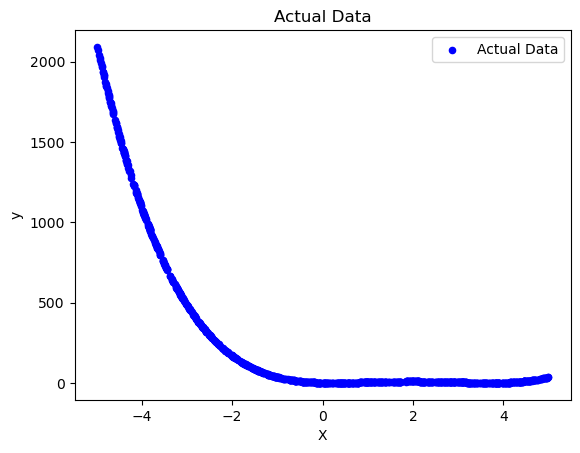

In [8]:
# Scatter plot of actual data
plt.scatter(X, y, color="blue", s=20, label="Actual Data")

# Labels and title
plt.xlabel("X")
plt.ylabel("y")
plt.title("Actual Data")
plt.legend()
plt.show()

In [9]:
# Train-test split (time order preserved here manually if sequential)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [18]:
# Polynomial regression
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [19]:
# Predictions
y_pred = model.predict(X_poly_test)

In [20]:
# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 1.1948619939196752e-14
MAE: 5.041431036551024e-08
R²: 1.0


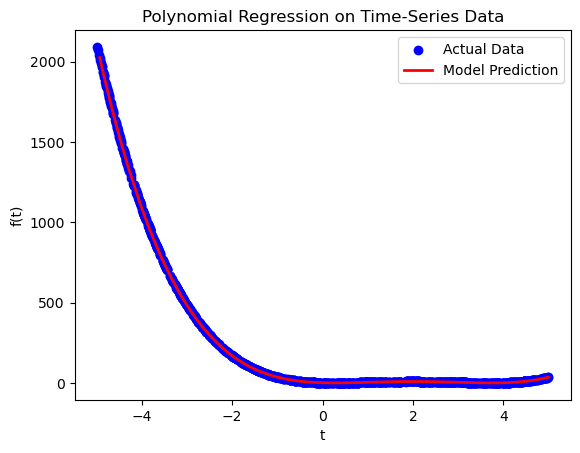

In [21]:
# Visualization
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(sorted(X_test["t"]), 
         y_pred[np.argsort(X_test["t"].values)], 
         color="red", linewidth=2, label="Model Prediction")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Polynomial Regression on Time-Series Data")
plt.legend()
plt.show()